30


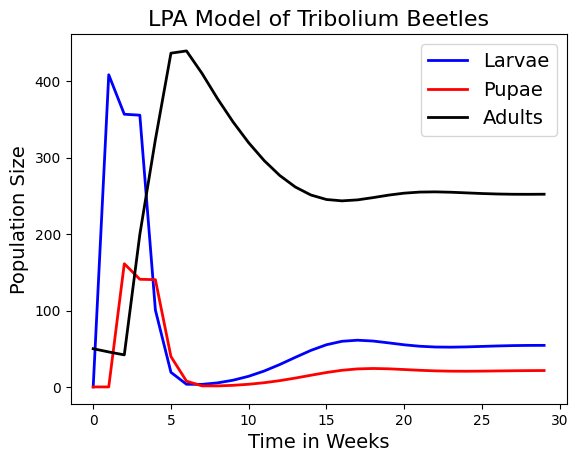

In [ ]:
# LPA with Samanthas best fit daya
import numpy as np
import math
import matplotlib.pyplot as plt

b = 20
mua = 0.0842
mul = 0.6053
cea = 0.0179
cel = 0.0003
cpa =  1.0760* 10**-13

maxT = 30
IC = [0,0,50]

print (maxT)

Df = np.zeros((maxT , 4));
Df[:,0] = np.arange(maxT)
Df[0, :] = [0,0,0,50 ]

for n in np.arange(1,maxT) :
  Df[n, 1] = b * Df[n-1,3]* math.exp((-cea*Df[n-1,3] - cel * Df[n-1,1]))
  Df[n, 2] = (1- mul) * Df[n-1,1]
  Df[n, 3] = Df[n-1,2] * math.exp((-cpa* Df[n-1,3])) + (1-mua) * Df[n-1,3]


plt.plot(Df[:,0],Df[:,1] , linewidth = 2, label = 'Larvae', color = 'b')
plt.plot(Df[:,0],Df[:,2] ,linewidth = 2, label = 'Pupae', color = 'r' )
plt.plot(Df[:,0],Df[:,3] , linewidth = 2,label = 'Adults', color = 'k', )
plt.xlabel('Time in Weeks', fontsize=14)
plt.ylabel('Population Size', fontsize=14)
plt.title('LPA Model of Tribolium Beetles', fontsize=16)
plt.legend(loc = 'upper right', fontsize = 14)




In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt



In [8]:
b = 11.6772
mua = 0.1108
mul = 0.5129
cea = 0.0110
cel = 0.0093
cpa =  0.0162

maxT = 18
IC = [0,0,50]

print (maxT )


18


In [9]:
Df = np.zeros((maxT , 4));
Df[:,0] = np.arange(maxT)
Df[0, :] = [0,0,0,50 ]

for n in np.arange(1,maxT) :
  Df[n, 1] = b * Df[n-1,3]* math.exp((-cea*Df[n-1,3] - cel * Df[n-1,1]))
  Df[n, 2] = (1- mul) * Df[n-1,1]
  Df[n, 3] = Df[n-1,2] * math.exp((-cpa* Df[n-1,3])) + (1-mua) * Df[n-1,3]



In [ ]:
print(Df)

[[  0.           0.           0.          50.        ]
 [  1.         336.85791629   0.          44.46      ]
 [  2.          13.87917492 164.08349102  39.533832  ]
 [  3.         262.65635833   6.7605461  121.63470609]
 [  4.          32.39404676 127.93991214 109.09993062]
 [  5.         283.87630795  15.77914018 118.86036744]
 [  6.          26.7912124  138.2761496  107.99119482]
 [  7.         299.65340756  13.04999956 120.06760485]
 [  8.          23.06169087 145.96117482 108.6299198 ]
 [  9.         309.87911007  11.23334962 121.71049994]
 [ 10.          20.87583507 150.94211452 109.78886748]
 [ 11.         315.56811343  10.16861926 123.11503954]
 [ 12.          19.72148266 153.71322805 110.85770625]
 [ 13.         318.31489174   9.6063342  124.08781893]
 [ 14.          19.16974497 155.05118377 111.62574201]
 [ 15.         319.45873765   9.33758277 124.67461026]
 [ 16.          18.93398537 155.60835111 112.09968094]
 [ 17.         319.84744643   9.22274427 124.99227301]
 [ 18.    

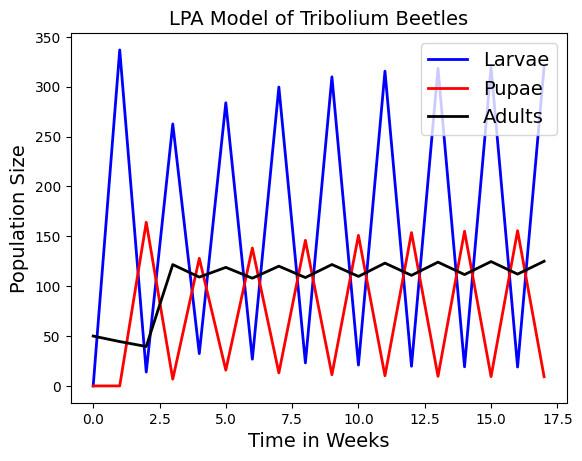

In [11]:
plt.plot(Df[:,0],Df[:,1] , linewidth = 2, label = 'Larvae', color = 'b' )
plt.plot(Df[:,0],Df[:,2] , linewidth = 2, label = 'Pupae', color = 'r' )
plt.plot(Df[:,0],Df[:,3] , linewidth = 2, label = 'Adults', color = 'k' )
plt.xlabel('Time in Weeks', fontsize = 14)
plt.ylabel('Population Size' , fontsize = 14)
plt.title('LPA Model of Tribolium Beetles',  fontsize = 14)
plt.legend(loc = 'upper right',  fontsize = 14)



Create a projection matrix of the LPA

In [ ]:
pop = np.array([[0,0,b * Df[n-1,3]* math.exp((0*Df[n-1,3] - 0 * Df[n-1,1]))],
                   [(1- mul),0,0],
                   [0, math.exp((-cpa* Df[n-1,3])),(1- mua)]])

vec = np.array([0,0,50])

matrix = np.dot(pop, vec)

In [ ]:
print(matrix)

[6.57299215e+04 0.00000000e+00 4.44600000e+01]


WE will redo the LPA Model WITH NOISE

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

b = 20
mua = 0.0842
mul = 0.6053
cea = 0.0179
cel = 0.0003
cpa =  1.0760* 10**-13
maxT = 30
IC = [0,0,50]

print (maxT + 1)


31


-0.35360060630491474
-0.26416719844783815
0.2241945487700006


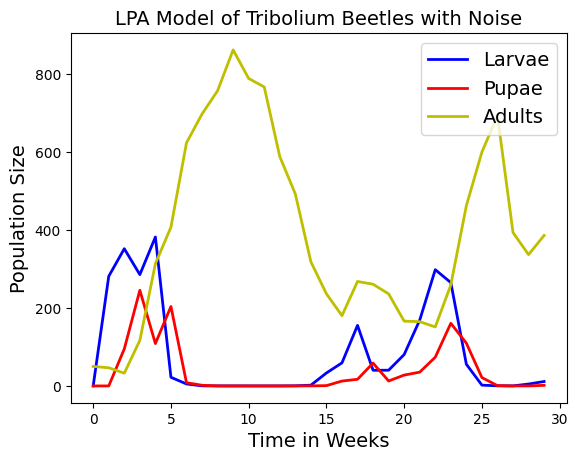

In [36]:
Df = np.zeros((maxT, 4));
Df[:,0] = np.arange(maxT)
Df[0, :] = [0,0,0,50 ]

for n in np.arange(1,maxT) :
  E1 = np.random.normal(0, .2)
  E2 = np.random.normal(0, .2)
  E3 = np.random.normal(0, .2)

  Df[n, 1] = b * Df[n-1,3]* math.exp(((-cea*Df[n-1,3] - cel * Df[n-1,1]) )+ E1)
  Df[n, 2] = ((1- mul) * Df[n-1,1]) * math.exp(E2)
  Df[n, 3] = (Df[n-1,2] * math.exp((-cpa* Df[n-1,3])) + (1-mua) * Df[n-1,3]) * math.exp(E3)
print(E1)
print(E2)
print(E3)

plt.plot(Df[:,0],Df[:,1] , linewidth = 2, label = 'Larvae', color = 'b' )
plt.plot(Df[:,0],Df[:,2] , linewidth = 2,label = 'Pupae', color = 'r' )
plt.plot(Df[:,0],Df[:,3] , linewidth = 2,label = 'Adults', color = 'y' )
plt.xlabel('Time in Weeks' ,fontsize = 14)
plt.ylabel('Population Size' ,fontsize = 14)
plt.title('LPA Model of Tribolium Beetles with Noise' ,fontsize = 14)
plt.legend(loc = 'upper right' ,fontsize = 14)



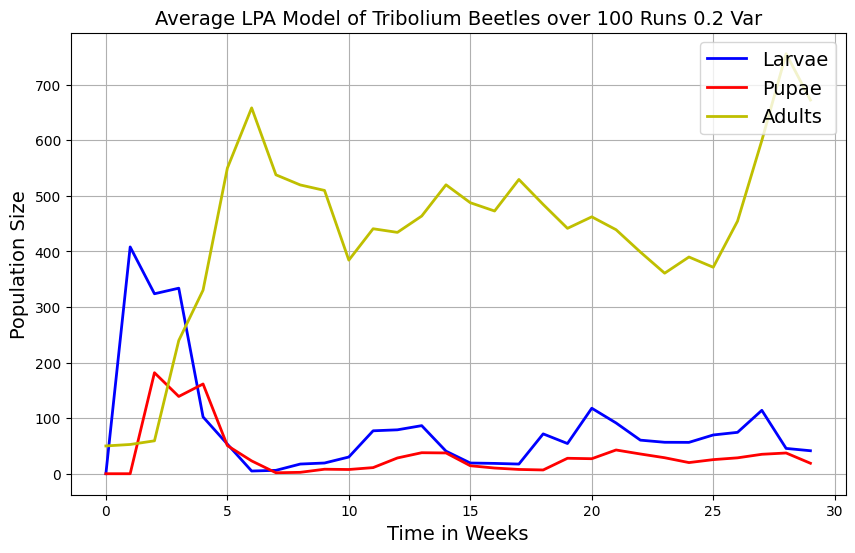

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
b = 20
mua = 0.0842
mul = 0.6053
cea = 0.0179
cel = 0.0003
cpa = 1.0760 * 10**-13
maxT = 30
num_runs = 100

# Initialize a 3D array to store the results of each run
all_runs = np.zeros((num_runs, maxT, 4))

# Run the simulation 100 times
for run in range(num_runs):
    Df = np.zeros((maxT, 4))
    Df[:, 0] = np.arange(maxT)
    Df[0, :] = [0, 0, 0, 50]  # Initial conditions for [Time, Larvae, Pupae, Adults]

    for n in range(1, maxT):
        E1 = np.random.normal(0, 0.2)
        E2 = np.random.normal(0, 0.2)
        E3 = np.random.normal(0, 0.2)

        larvae_prev = Df[n-1, 1]
        pupae_prev = Df[n-1, 2]
        adults_prev = Df[n-1, 3]

        larvae = b * adults_prev * np.exp(-cea * adults_prev - cel * larvae_prev + E1)
        pupae = (1 - mul) * larvae_prev * np.exp(E2)
        adults = (pupae_prev * np.exp(-cpa * adults_prev) + (1 - mua) * adults_prev) * np.exp(E3)

        Df[n, :] = [n, larvae, pupae, adults]


    all_runs[run, :, :] = Df[:, :]


average_run = np.mean(all_runs, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(average_run[:, 0], average_run[:, 1], linewidth=2, label='Larvae', color='b')
plt.plot(average_run[:, 0], average_run[:, 2], linewidth=2, label='Pupae', color='r')
plt.plot(average_run[:, 0], average_run[:, 3], linewidth=2, label='Adults', color='y')
plt.xlabel('Time in Weeks', fontsize=14)
plt.ylabel('Population Size', fontsize=14)
plt.title('Average LPA Model of Tribolium Beetles over 100 Runs 0.2 Var', fontsize=14)
plt.legend(loc='upper right', fontsize=14)
plt.grid(True)
plt.show()


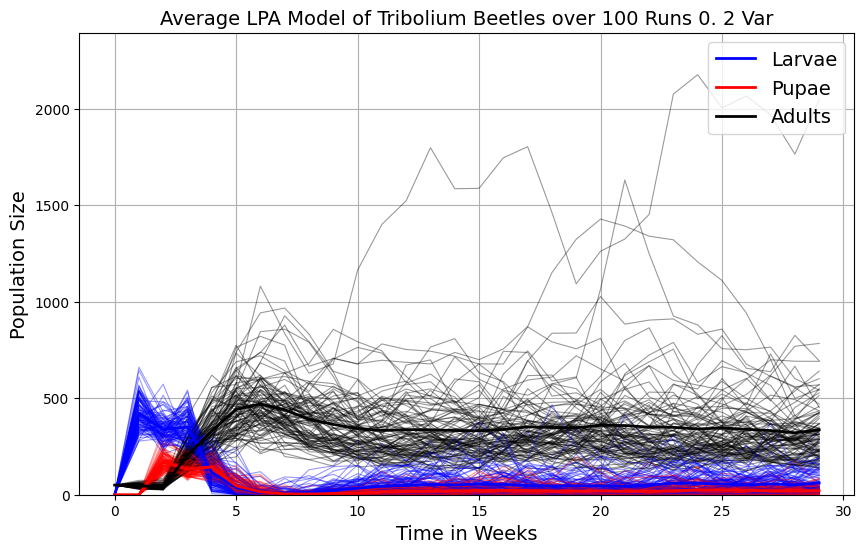

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
b = 20
mua = 0.0842
mul = 0.6053
cea = 0.0179
cel = 0.0003
cpa = 1.0760 * 10**-13
maxT = 30
num_runs = 100

# Initialize a 3D array to store the results of each run
all_runs = np.zeros((num_runs, maxT, 4))

# Run the simulation 100 times
for run in range(num_runs):
    Df = np.zeros((maxT, 4))
    Df[:, 0] = np.arange(maxT)
    Df[0, :] = [0, 0, 0, 50]  # Initial conditions for [Time, Larvae, Pupae, Adults]

    for n in range(1, maxT):
        E1 = np.random.normal(0, 0.2)
        E2 = np.random.normal(0, 0.2)
        E3 = np.random.normal(0, 0.2)

        larvae_prev = Df[n-1, 1]
        pupae_prev = Df[n-1, 2]
        adults_prev = Df[n-1, 3]

        larvae = b * adults_prev * np.exp(-cea * adults_prev - cel * larvae_prev + E1)
        pupae = (1 - mul) * larvae_prev * np.exp(E2)
        adults = (pupae_prev * np.exp(-cpa * adults_prev) + (1 - mua) * adults_prev) * np.exp(E3)

        Df[n, :] = [n, larvae, pupae, adults]

    all_runs[run, :, :] = Df[:, :]

average_run = np.mean(all_runs, axis=0)

max_larvae = np.max(all_runs[:, :, 1])
max_pupae = np.max(all_runs[:, :, 2])
max_adults = np.max(all_runs[:, :, 3])
max_y = max(max_larvae, max_pupae, max_adults)

y_margin = 0.1 * max_y  # 10% margin
y_max = max_y + y_margin


plt.figure(figsize=(10, 6))
for run in range(num_runs):
    plt.plot(all_runs[run, :, 0], all_runs[run, :, 1], color='b', alpha=0.4, linewidth=0.8)
    plt.plot(all_runs[run, :, 0], all_runs[run, :, 2], color='r', alpha=0.4, linewidth=0.8)
    plt.plot(all_runs[run, :, 0], all_runs[run, :, 3], color='k', alpha=0.4, linewidth=0.8)


plt.plot(average_run[:, 0], average_run[:, 1], linewidth=2, label='Larvae', color='b')
plt.plot(average_run[:, 0], average_run[:, 2], linewidth=2, label='Pupae', color='r')
plt.plot(average_run[:, 0], average_run[:, 3], linewidth=2, label='Adults', color='k')


plt.ylim(0, y_max)


plt.xlabel('Time in Weeks', fontsize=14)
plt.ylabel('Population Size', fontsize=14)
plt.title('Average LPA Model of Tribolium Beetles over 100 Runs 0. 2 Var', fontsize=14)
plt.legend(loc='upper right', fontsize=14)
plt.grid(True)


plt.show()


LPAA Model in Python

In [ ]:
b = 6.4232
mul = 0.6053
mup = 2.64e-12
mua = 0.358
c1 = 0.0099
c2 = 0.0028


maxT = 30
IC = [0,0,50]

print (maxT + 1)

31


In [ ]:
Df = np.zeros((maxT, 5));
Df[:,0] = np.arange(maxT)
Df[0, :] = [0,0,0, 0, 50 ]

for n in np.arange(1,maxT) :
  Df[n, 1] = b * Df[n-1,4]* math.exp((-c1*Df[n-1,4]))
  Df[n, 2] = (1- mul) * Df[n-1,1]
  Df[n, 3] = (1 - mup) * Df[n-1, 2]
  Df[n, 4] = Df[n-1,3] * math.exp((-c2* Df[n-1,4])) + (1-mua) * Df[n-1,4]


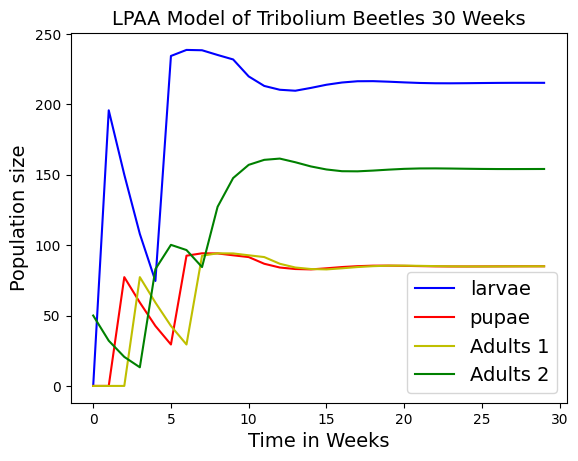

In [ ]:
plt.plot(Df[:,0],Df[:,1] , label = 'larvae', color = 'b' )
plt.plot(Df[:,0],Df[:,2] , label = 'pupae', color = 'r' )
plt.plot(Df[:,0],Df[:,3] , label = 'Adults 1', color = 'y' )
plt.plot(Df[:,0], Df[:,4], label = 'Adults 2', color = 'g' )
plt.xlabel('Time in Weeks', fontsize=14)
plt.ylabel('Population size',  fontsize=14)
plt.title('LPAA Model of Tribolium Beetles 30 Weeks', fontsize=14)
plt.legend(loc = 'lower right',  fontsize=14)


61


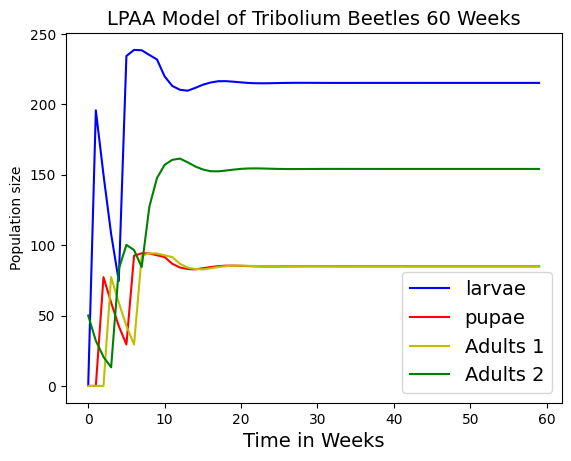

In [ ]:
b = 6.4232
mul = 0.6053
mup = 2.64e-12
mua = 0.358
c1 = 0.0099
c2 = 0.0028


maxT = 60
IC = [0,0,50]

print (maxT + 1)

Df = np.zeros((maxT, 5));
Df[:,0] = np.arange(maxT)
Df[0, :] = [0,0,0, 0, 50 ]

for n in np.arange(1,maxT) :
  Df[n, 1] = b * Df[n-1,4]* math.exp((-c1*Df[n-1,4]))
  Df[n, 2] = (1- mul) * Df[n-1,1]
  Df[n, 3] = (1 - mup) * Df[n-1, 2]
  Df[n, 4] = Df[n-1,3] * math.exp((-c2* Df[n-1,4])) + (1-mua) * Df[n-1,4]

plt.plot(Df[:,0],Df[:,1] , label = 'larvae', color = 'b' )
plt.plot(Df[:,0],Df[:,2] , label = 'pupae', color = 'r' )
plt.plot(Df[:,0],Df[:,3] , label = 'Adults 1', color = 'y' )
plt.plot(Df[:,0], Df[:,4], label = 'Adults 2', color = 'g' )
plt.xlabel('Time in Weeks',  fontsize=14)
plt.ylabel('Population size')
plt.title('LPAA Model of Tribolium Beetles 60 Weeks',  fontsize=14)
plt.legend(loc = 'lower right',  fontsize=14)

